# Predicting Diabetes

## Import Libraries

In [5]:
import pandas as pd                   #pandas is a dataframe library
import matplotlib.pyplot as plt       #matplotlib.pyplot plots data
import numpy as np                    #numpy provides N-dim object support

# do ploting inline instead of in a separate window
%matplotlib inline

## 1. Load and review data

In [38]:
df = pd.read_csv("./data/pima-data.csv") # load pima data.

*Get shape of the dataframe (N-rows, N-cols)* 

In [11]:
df.shape 

(768, 10)

*Inspect dataframe. *

In [12]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [18]:
df.tail(2)


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [19]:
df.diastolic_bp[1]

66

   ###    Review data

*check for null values in any column*


In [22]:
df.isnull().values.any()

False

*Visualize correlations*

In [32]:
"Blue not correlated; Yellow highly correlated"
def plot_corr(df,size=11):
        corr = df.corr() #dataframe correlation function
        fig, ax = plt.subplots(figsize=(size,size))
        ax.matshow(corr) # color code the rectangles with correlation strength
        plt.xticks(range(len(corr.columns)), corr.columns)
        plt.yticks(range(len(corr.columns)), corr.columns)

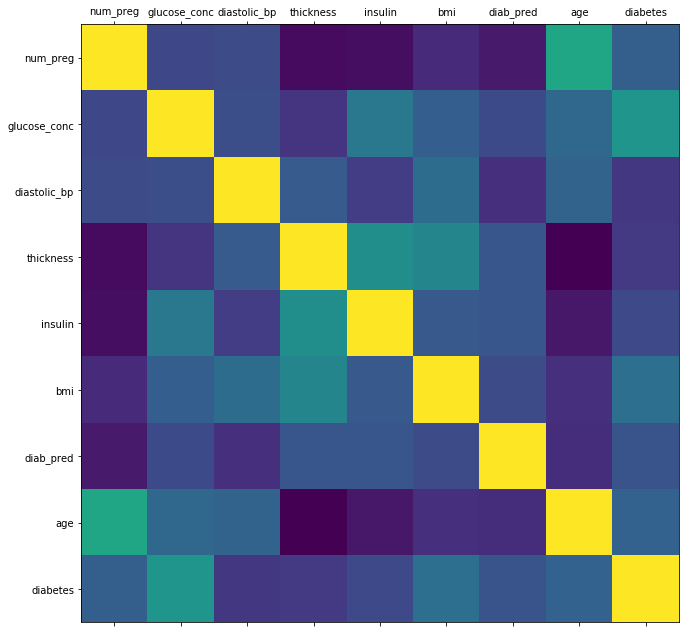

In [41]:
plot_corr(df)

In [33]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


*=> Because skin and thickness are higly correlated we can drop one as by varying on the same way they don´t bring any value to the model*

#### Remove skin column

In [40]:
del df['skin']

In [36]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


## 2. Molding the data

### Check data types

*Change dependent variable to numeric to fit all possible algorithms*

In [44]:
diabetes_map = {True : 1, False: 0}

In [45]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [46]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Analyze distributions of class (true/false ratio)

In [55]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])

print("Number of true cases: {0} ({1:2.2f}) %".format(num_true, (num_true / (num_true + num_false)) * 100))
print("Number of false cases: {0} ({1:2.2f}) %".format(num_false, (num_false / (num_true + num_false)) * 100))
    

Number of true cases: 268 (34.90) %
Number of false cases: 500 (65.10) %


## 3. Training the model

### Spliting the data
70% for training, 30% for testing 

In [71]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

x = df[feature_col_names].values 
y = df[predicted_class_names].values 
split_test_size = 0.30

# set seed to 42 to make sure we have reproductive results
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=split_test_size, random_state=42)

Check split percentages for feature df

In [78]:
print("{0:0.2f} % in training set".format((len(x_train) / len(df.index))  * 100))
print("{0:0.2f} % in training set".format((len(x_test) / len(df.index))  * 100))

69.92 % in training set
30.08 % in training set


TODO: Check split percentages for class df

### Post-split data preparation

Check hidden missing values (0 value in features than dont make sense to be 0)

In [85]:
print("# Rows in dataframe {0}".format(len(df)))
print("# Rows in missing for col {1} {0}".format(len(df.loc[df['glucose_conc'] == 0]), 'glucose_conc'))
print("# Rows in missing for col {1} {0}".format(len(df.loc[df['num_preg'] == 0]), 'num_preg'))
print("# Rows in missing for col {1} {0}".format(len(df.loc[df['diastolic_bp'] == 0]), 'diastolic_bp'))
print("# Rows in missing for col {1} {0}".format(len(df.loc[df['thickness'] == 0]), 'thickness'))
print("# Rows in missing for col {1} {0}".format(len(df.loc[df['insulin'] == 0]), 'insulin'))
print("# Rows in missing for col {1} {0}".format(len(df.loc[df['bmi'] == 0]), 'bmi'))
print("# Rows in missing for col {1} {0}".format(len(df.loc[df['diab_pred'] == 0]), 'diab_pred'))
print("# Rows in missing for col {1} {0}".format(len(df.loc[df['age'] == 0]), 'age'))


# Rows in dataframe 768
# Rows in missing for col glucose_conc 5
# Rows in missing for col num_preg 111
# Rows in missing for col diastolic_bp 35
# Rows in missing for col thickness 227
# Rows in missing for col insulin 374
# Rows in missing for col bmi 11
# Rows in missing for col diab_pred 0
# Rows in missing for col age 0


Solution: 
1. Ignore
2. drop all observations with these error
3. (Impute) replace values by mean * , median for example
4. (Impute) replace by a knowledge derived value

#### Impute hidden missing values with mean 

In [89]:
from sklearn.preprocessing import Imputer


# Impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_train)

### Train with NAIVE BAYES

In [94]:
from sklearn.naive_bayes import GaussianNB 

# create gaussian naive bayes model object and train it with data
nb_model = GaussianNB()

#train with training set
nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None)